In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.models import load_model, Model
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
! ls 'gdrive/My Drive/Colab Notebooks/'

ls: cannot access 'drive/My Drive/Colab Notebooks/': No such file or directory


In [0]:
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/creditcard.csv")

In [0]:
data.shape

(284807, 31)

In [0]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

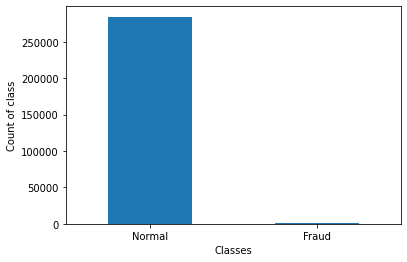

In [0]:
count_class = data.Class.value_counts()
count_class.plot(kind ='bar', rot= 0)
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Classes")
plt.ylabel("Count of class")
plt.show()

## Normal to Fraud Class ratio


In [0]:
import math
print("Ratio to normal to fraud class is: {:.2f}: {:.2f}".format((count_class[0]/sum(count_class))*100, count_class[1]/sum(count_class) *100))

Ratio to normal to fraud class is: 99.83: 0.17


# Building an AutoEncoder 

### Data pre-processing

In [0]:
data = data.drop(['Time'],axis =1)

In [0]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [0]:
## Scaling the values in "Amount" column:

from sklearn.preprocessing import StandardScaler
data.Amount = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))


In [0]:
X_train, X_test = train_test_split(data , test_size = 0.2, random_state = 42)

In [0]:
y_test = X_test.Class

In [0]:
input_shape = X_train.shape[1]

In [0]:
encoding_dim = 14

In [0]:
Input_layer = Input(shape=(input_shape,))

In [0]:
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(Input_layer)
encoder = Dense(encoding_dim/2 , activation = "relu") (encoder)

decoder = Dense(encoding_dim/2, activation = "tanh")(encoder)
decoder = Dense(input_shape, activation = "relu")(decoder)

autoencoder = Model(inputs = Input_layer, outputs = decoder)

print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense (Dense)                (None, 14)                434       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 30)                240       
Total params: 835
Trainable params: 835
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
nb_epoch = 10
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer]).history

Epoch 1/10
7121/7121 [==============================] - 25s 4ms/step - loss: 0.8429 - accuracy: 0.5654 - val_loss: 0.7693 - val_accuracy: 0.6334
Epoch 2/10
7121/7121 [==============================] - 25s 3ms/step - loss: 0.7706 - accuracy: 0.6486 - val_loss: 0.7477 - val_accuracy: 0.6633
Epoch 3/10
7121/7121 [==============================] - 25s 3ms/step - loss: 0.7563 - accuracy: 0.6682 - val_loss: 0.7387 - val_accuracy: 0.6735
Epoch 4/10
7121/7121 [==============================] - 25s 3ms/step - loss: 0.7503 - accuracy: 0.6758 - val_loss: 0.7360 - val_accuracy: 0.6760
Epoch 5/10
7121/7121 [==============================] - 25s 3ms/step - loss: 0.7465 - accuracy: 0.6801 - val_loss: 0.7306 - val_accuracy: 0.6797
Epoch 6/10
7121/7121 [==============================] - 24s 3ms/step - loss: 0.7389 - accuracy: 0.6838 - val_loss: 0.7218 - val_accuracy: 0.6809
Epoch 7/10
7121/7121 [==============================] - 24s 3ms/step - loss: 0.7310 - accuracy: 0.6881 - val_loss: 0.7170 - val_ac

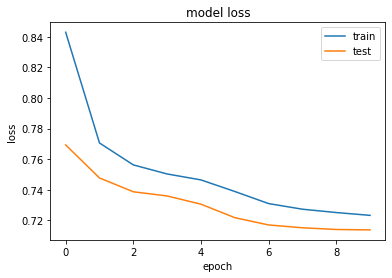

In [0]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');


In [0]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.712886,0.001720
std,3.290098,0.041443
min,0.040243,0.000000
25%,0.234031,0.000000
50%,0.388792,0.000000
75%,0.607441,0.000000
max,247.108332,1.000000


## Reconstruction error without Fraud

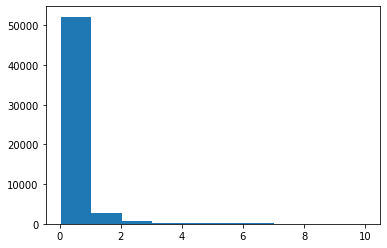

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

## Reconstruction Error with Fraud

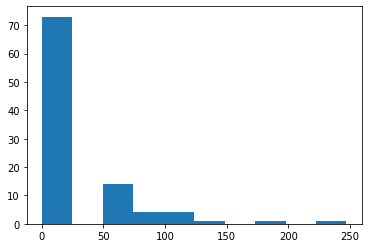

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [0]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

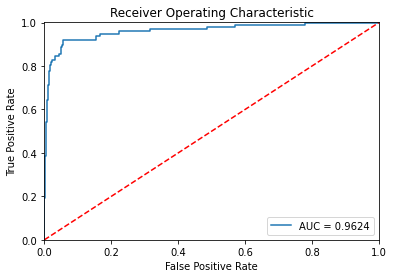

In [0]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

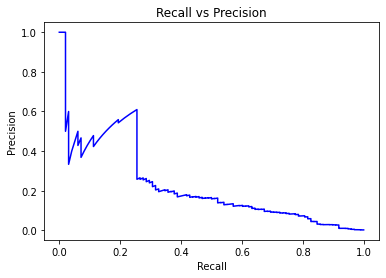

In [0]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()